* Not upto the mark

In [1]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

importing Datasets

In [2]:
trainset=pd.read_csv('../input/nlp-getting-started/train.csv')
testset=pd.read_csv('../input/nlp-getting-started/test.csv')

In [3]:
x=trainset.drop((['location', 'id']), axis=1)
x['keyword']=x['keyword'].fillna('nil')
y=x['target']

In [7]:
wordLemm = WordNetLemmatizer()
def preprocess(text):
    text=text.lower() 
    text = text.split()
    text = [wordLemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]
    text = ' '.join(text)
    return text

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" #emoticons
                               u"\U0001F300-\U0001F5FF" #symbols&pics
                               u"\U0001F680-\U0001F6FF" #transportation pic
                               u"\U0001F1E0-\U0001F1FF" #flags
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"    
                               "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

def apply_func(text):
    text = text.apply(lambda x: remove_url(x))
    text= text.apply(lambda x: remove_html(x))
    text= text.apply(lambda x: remove_emoji(x))
    return text


In [13]:
x['text']=apply_func(x['text'])
x['keyword']=apply_func(x['keyword'])

ValueError: Wrong number of items passed 2, placement implies 1

In [19]:
new=x['keyword']+' '+x['text']
new

0       nil Our Deeds are the Reason of this #earthqua...
1              nil Forest fire near La Ronge Sask. Canada
2       nil All residents asked to 'shelter in place' ...
3       nil 13,000 people receive #wildfires evacuatio...
4       nil Just got sent this photo from Ruby #Alaska...
                              ...                        
7608    nil Two giant cranes holding a bridge collapse...
7609    nil @aria_ahrary @TheTawniest The out of contr...
7610      nil M1.94 [01:04 UTC]?5km S of Volcano Hawaii. 
7611    nil Police investigating after an e-bike colli...
7612    nil The Latest: More Homes Razed by Northern C...
Length: 7613, dtype: object

In [20]:
x['text']=apply_func(x['text'])
x['keyword']=apply_func(x['keyword'])
train_new=x['keyword']+' '+x['text']
corpus=[]
for i in range(len(new)):
    txt=preprocess(new[i])
    txt=txt.translate(str.maketrans('', '', string.punctuation))
    corpus.append(txt)

In [21]:
corpus

['nil deed reason earthquake may allah forgive u',
 'nil forest fire near la ronge sask canada',
 'nil resident asked shelter place notified officers evacuation shelter place order expected',
 'nil 13000 people receive wildfires evacuation order california',
 'nil got sent photo ruby alaska smoke wildfires pours school',
 'nil rockyfire update  california hwy 20 closed direction due lake county fire cafire wildfires',
 'nil flood disaster heavy rain cause flash flooding street manitou colorado spring area',
 'nil im top hill see fire woods',
 'nil theres emergency evacuation happening building across street',
 'nil im afraid tornado coming area',
 'nil three people died heat wave far',
 'nil haha south tampa getting flooded hah wait second live south tampa gonna gonna fvck flooding',
 'nil raining flooding florida tampabay tampa 18 19 days ive lost count',
 'nil flood bago myanmar we arrived bago',
 'nil damage school bus 80 multi car crash breaking',
 'nil whats man',
 'nil love fruit

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus, y, test_size=0.33, random_state=0)

In [42]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
seq_train = tokenizer.texts_to_sequences(X_train)
seq_test = tokenizer.texts_to_sequences(X_test)
print('the length of train sequence is', len(seq_train), ',& the length of test sequence is', len(seq_test))

the length of train sequence is 5100 ,& the length of test sequence is 2513


In [43]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 13588 unique tokens.


In [45]:
X_train=pad_sequences(seq_train)
size=train_data.shape[1]
X_test=pad_sequences(seq_test, maxlen=size)
print(train_data.shape, test_data.shape)
y_test, y_train=y_test.values, y_train.values

(5100, 24) (2513, 24)


In [49]:
from tensorflow.keras.layers import Dense, GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, Dropout
from tensorflow.keras import Sequential


model = Sequential([
    Embedding(V+1, 24, name="embedding"),
    LSTM(40, return_sequences=True),
    Dropout(0.2),
    GlobalMaxPooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [50]:
#y_train=y.values
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r= model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=10)

Epoch 1/10
160/160 [==============================] - 3s 20ms/step - loss: 0.6399 - accuracy: 0.6231 - val_loss: 0.4962 - val_accuracy: 0.7879
Epoch 2/10
160/160 [==============================] - 3s 17ms/step - loss: 0.3690 - accuracy: 0.8510 - val_loss: 0.4527 - val_accuracy: 0.7939
Epoch 3/10
160/160 [==============================] - 3s 18ms/step - loss: 0.2116 - accuracy: 0.9261 - val_loss: 0.4497 - val_accuracy: 0.8002
Epoch 4/10
160/160 [==============================] - 3s 18ms/step - loss: 0.1370 - accuracy: 0.9533 - val_loss: 0.5305 - val_accuracy: 0.7911
Epoch 5/10
160/160 [==============================] - 3s 18ms/step - loss: 0.0984 - accuracy: 0.9702 - val_loss: 0.5741 - val_accuracy: 0.7799
Epoch 6/10
160/160 [==============================] - 3s 17ms/step - loss: 0.0818 - accuracy: 0.9751 - val_loss: 0.5778 - val_accuracy: 0.7740
Epoch 7/10
160/160 [==============================] - 3s 17ms/step - loss: 0.0689 - accuracy: 0.9792 - val_loss: 0.5578 - val_accuracy: 0.7887

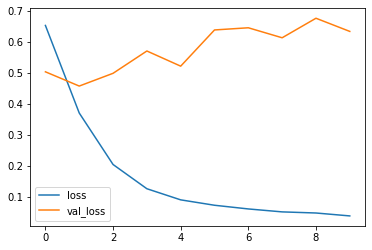

In [48]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()